In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [118]:
df19=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2019.csv')
df=df19
df18=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2018.csv')
df17=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2017.csv')
df16=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2016.csv')
df15=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2015.csv')

In [119]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [120]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [122]:
#Rename the columns to remove the spaces in the column names for easier specification in the code
df.columns=['Rank','Country','Happiness_Score','GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']

In [123]:
df.head(10)

,Rank,Country,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [124]:
df.info

<bound method DataFrame.info of      Rank                   Country  Happiness_Score  GDP_PerCapita  \
0       1                   Finland            7.769          1.340   
1       2                   Denmark            7.600          1.383   
2       3                    Norway            7.554          1.488   
3       4                   Iceland            7.494          1.380   
4       5               Netherlands            7.488          1.396   
..    ...                       ...              ...            ...   
151   152                    Rwanda            3.334          0.359   
152   153                  Tanzania            3.231          0.476   
153   154               Afghanistan            3.203          0.350   
154   155  Central African Republic            3.083          0.026   
155   156               South Sudan            2.853          0.306   

     Social_Support  Healthy_life_expectancy  Freedom_to_make_life_choices  \
0             1.587                  

In [125]:
#Common statistics calculated on the dataset
df.describe()

,Rank,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [126]:
#df.groupby('Country')['Rank'].sum().sort_values(ascending=True)[0:20].plot(kind='barh')

In [127]:
df.size

1404

In [128]:
#pip install plotly

In [129]:
fig = px.choropleth(data_frame=df,locations="Country",locationmode="country names",color="Happiness_Score",title="Country wise happiness score")
fig.show()

In [130]:
# fig = px.bar(df.sort_values('Rank',ascending=True)[:25].sort_values('Rank') ,y='Country',
#              x='Rank', title='25 Most Happiest Countries',orientation='h',height=1000)
# fig.show()

# Exploratory Data Analysis


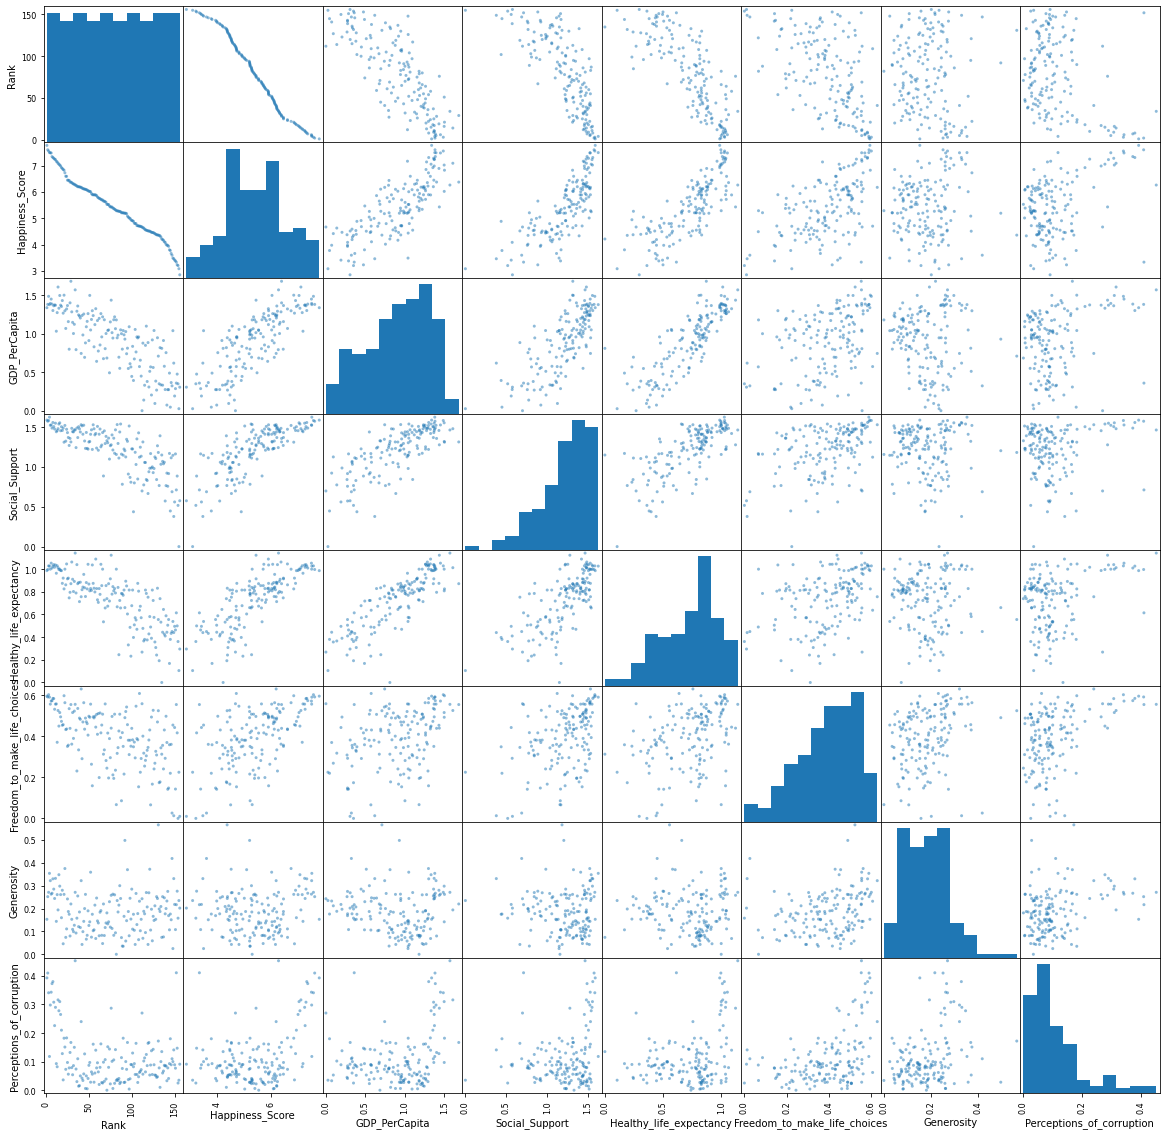

In [131]:
pd.plotting.scatter_matrix(df,figsize=[20,20])
plt.show()

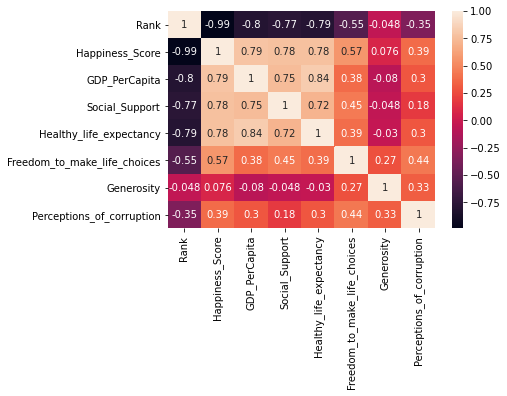

In [132]:
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

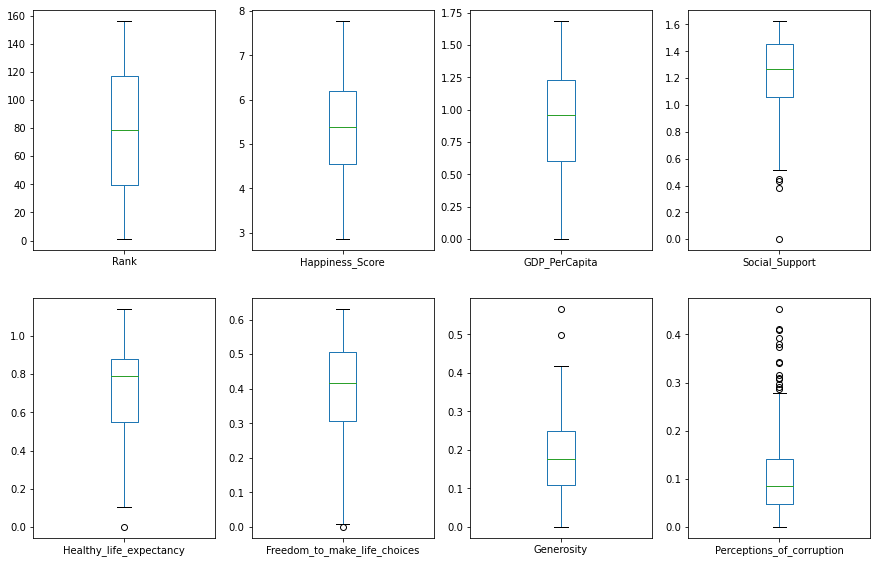

In [133]:
plt.clf()
df.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False,figsize=[15,15])
plt.show()

There were some outliers which were removed with the help of IQR and boxplot

In [134]:
print(df.columns)

Index(['Rank', 'Country', 'Happiness_Score', 'GDP_PerCapita', 'Social_Support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')


[]

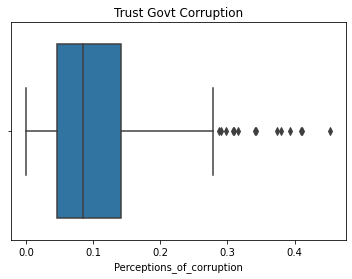

In [135]:
plt.title("Trust Govt Corruption")
sns.boxplot(x=df['Perceptions_of_corruption'])
plt.plot()

In [136]:
print(df.shape)

(156, 9)


In [137]:
q1 = df['Perceptions_of_corruption'].quantile(0.25)
q3 = df['Perceptions_of_corruption'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR
print(ll,ul)

-0.09437499999999997 0.28262499999999996


In [138]:
print(np.where(df['Perceptions_of_corruption']>0.3))

(array([  0,   1,   2,   5,   6,   7,   8,  13,  15,  33, 151], dtype=int64),)


In [139]:
df.drop(df[df['Perceptions_of_corruption'] < ll].index, inplace = True)
df.drop(df[df['Perceptions_of_corruption'] > ul].index, inplace = True)
print(df.shape)

(142, 9)


[]

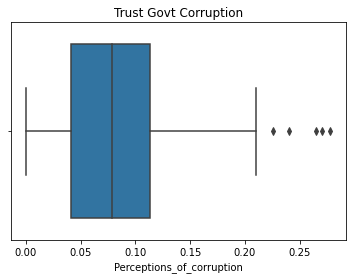

In [140]:
plt.title("Trust Govt Corruption")
sns.boxplot(x=df['Perceptions_of_corruption'])
plt.plot()

[]

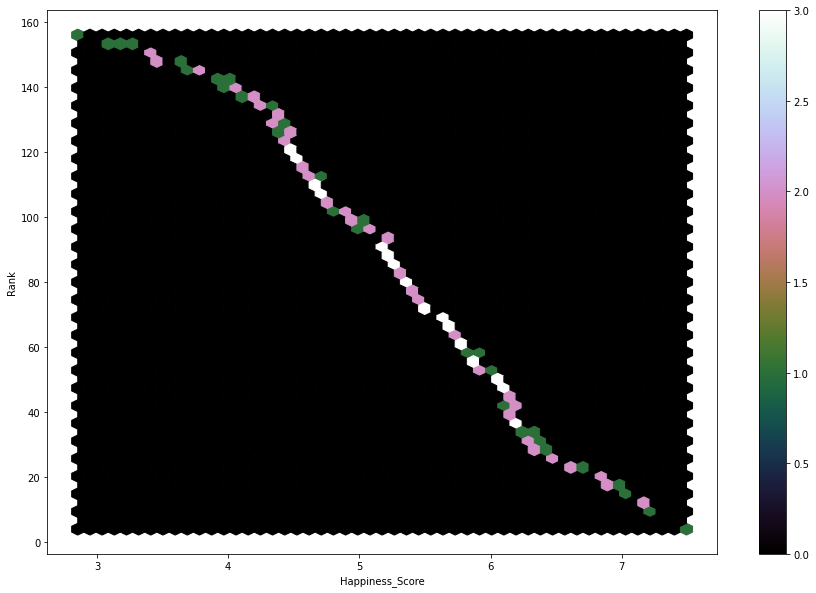

In [141]:
df.plot(y= 'Rank', x ='Happiness_Score',kind='hexbin',gridsize=50, sharex=False, colormap='cubehelix',figsize=(15,10))
plt.plot()

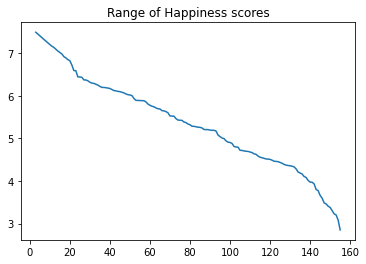

In [142]:
plt.title('Range of Happiness scores')
plt.plot(df['Happiness_Score'])

Here we can see that the Happiness scores range between 7.76 to 2.85

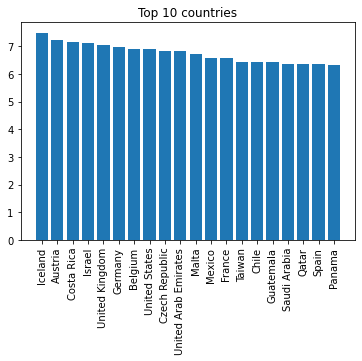

In [143]:
df1 = df.head(20)
plt.clf()
plt.title("Top 10 countries")
plt.xticks(rotation=90)
plt.bar(df1['Country'],df1['Happiness_Score'])
plt.show()

The top 10 and bottom 10 countries are listed based on their happiness index via bar-graph

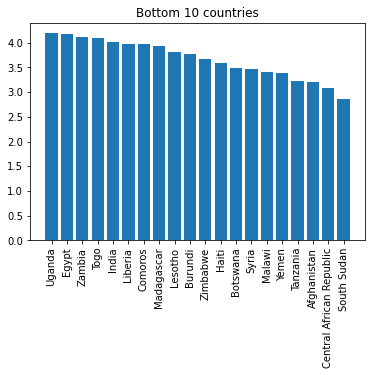

In [144]:
df1 = df.tail(20)
plt.clf()
plt.title("Bottom 10 countries")
plt.xticks(rotation=90)
plt.bar(df1['Country'],df1['Happiness_Score'])
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

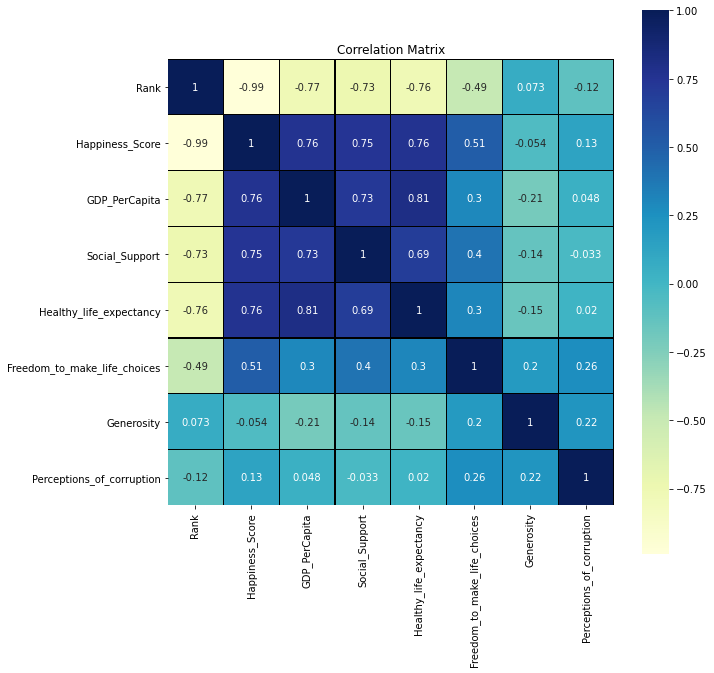

In [145]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

From the above correlation matrix we can get to know how excatly different factors are correlated

# Variation of features through the years

In [146]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [147]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [148]:
df15.drop(['Region','Standard Error','Dystopia Residual'],axis=1,inplace=True)

In [149]:
df15['Year'] = [2015 for i in range(df15.shape[0])]

In [150]:
df15.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [151]:
#Rename the columns to remove the spaces in the column names for easier specification in the code
df15.columns=['Country','Rank','Happiness_Score','GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Perceptions_of_corruption','Generosity','Year']

In [152]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [153]:
df16.drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1,inplace=True)
df16['Year'] = [2016 for i in range(df16.shape[0])]

In [154]:
df16.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [155]:
#Rename the columns to remove the spaces in the column names for easier specification in the code
df16.columns=['Country','Rank','Happiness_Score','GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Perceptions_of_corruption','Generosity','Year']

In [156]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [157]:
df17.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1,inplace=True)
df17['Year'] = [2017 for i in range(df17.shape[0])]

In [158]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [159]:
#Rename the columns to remove the spaces in the column names for easier specification in the code
df17.columns=['Country','Rank','Happiness_Score','GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption','Year']

In [160]:
df17.head()

,Country,Rank,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [161]:
df18['Year'] = [2018 for i in range(df18.shape[0])]
df18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [162]:
#Rename the columns to remove the spaces in the column names for easier specification in the code
df18.columns=['Rank','Country','Happiness_Score','GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption','Year']

In [163]:
df18.head()

,Rank,Country,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [164]:
df19['Year'] = [2019 for i in range(df19.shape[0])]

In [165]:
#Rename the columns to remove the spaces in the column names for easier specification in the code
df19.columns=['Rank','Country','Happiness_Score','GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption','Year']
df19.head()

,Rank,Country,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2019
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,2019
12,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,2019
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,2019


In [169]:
df_combined = pd.concat([df15,df16,df17,df18,df19],axis= 0)
df_combined.sort_values(by=['Country','Year'], axis=0, ascending=True, inplace=True)
df_combined.reset_index(inplace=True)

In [170]:
df_combined.head(20)

,index,Country,Rank,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Generosity,Year
0,152,Afghanistan,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,153,Afghanistan,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,140,Afghanistan,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,144,Afghanistan,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,153,Afghanistan,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
5,94,Albania,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,2015
6,108,Albania,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,2016
7,108,Albania,109,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,2017
8,111,Albania,112,4.586,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,2018
9,106,Albania,107,4.719,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,2019


In [172]:
print("Shape",df_combined.shape)
print(df_combined.columns)


Shape (768, 11)
Index(['index', 'Country', 'Rank', 'Happiness_Score', 'GDP_PerCapita',
       'Social_Support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Perceptions_of_corruption',
       'Generosity', 'Year'],
      dtype='object')


In [173]:
print("Total number of countries in the dataset: ")
print(df_combined.groupby('Country').size())

Total number of countries in the dataset: 
Country
Afghanistan    5
Albania        5
Algeria        5
Angola         4
Argentina      5
              ..
Venezuela      5
Vietnam        5
Yemen          5
Zambia         5
Zimbabwe       5
Length: 170, dtype: int64


In [189]:
df_15=np.random.choice(df15.index,16,replace=False)
df15.drop(df_15)

,Country,Rank,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Burkina Faso,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,2015
152,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,2015
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015


In [191]:
df_16=np.random.choice(df16.index,15,replace=False)
df16.drop(df_16)

,Country,Rank,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Generosity,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016
5,Canada,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2016
...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2016
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2016
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2016
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,2016


In [193]:
df_17=np.random.choice(df17.index,13,replace=False)
df17.drop(df_17)

,Country,Rank,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2017


In [197]:
df_18=np.random.choice(df18.index,14,replace=False)
df18.drop(df_18)

,Rank,Country,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [207]:
l15 = list(df15.mean())
l16 = list(df16.mean())
l17 = list(df17.mean())
l18 = list(df18.mean())
l19 = list(df19.mean())

In [299]:
df_18=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2018.csv')
df_17=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2017.csv')
df_16=pd.read_csv('/Users/AdithyaR07/Desktop/DA/Project/Datasets/World Happiness Report-2016.csv')

In [313]:
df16.columns
#df16.drop(['Dystopia Residual'],axis= 1, inplace = True)
df_16.drop(['Country','Year'],axis= 1, inplace = True)
df16.columns

KeyError: "['Year'] not found in axis"

In [307]:
df0 = df17.copy()
df17.columns
#df17.drop(['Dystopia Residual','Combined_score'],axis= 1, inplace = True)
df17.drop(['Country','Year'],axis= 1, inplace = True)
df17.columns

Index(['Rank', 'Happiness_Score', 'GDP_PerCapita', 'Social_Support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [309]:
df18.columns
df18.drop(['Country','Year'],axis= 1, inplace = True)

In [311]:
l16 = list(df16.mean())
print(l16)
l17 = list(df17.mean())
print(l17)
l18 = list(df18.mean())
print(l18)

[78.98089171974522, 5.382184713375795, 0.9538798089171973, 0.7936210828025482, 0.5576189808917195, 0.3709938853503184, 0.13762375796178344, 0.24263490445859875]
[78.0, 5.354019355773926, 0.9847182019463474, 1.1888977504545641, 0.5513407826123219, 0.4087859728583886, 0.24688347161657387, 0.12312022065142951]
[78.5, 5.375916666666668, 0.8914487179487178, 1.2132371794871797, 0.5973461538461537, 0.4545064102564102, 0.1810064102564103, 0.11200000000000002]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

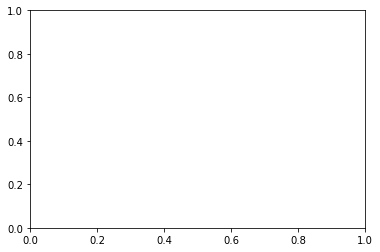

In [312]:
x = np.arange(6)
y1 = l16
y2 = l17
y3 = l18
width = 0.2
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, list(df17.columns))
plt.xlabel("Factors")
plt.xticks(rotation=90)
plt.title("Variation of factors over time")
plt.ylabel("Mean ")
plt.legend(["2016", "2017", "2018"])
plt.show()

# Correlation between various features and Happiness Score

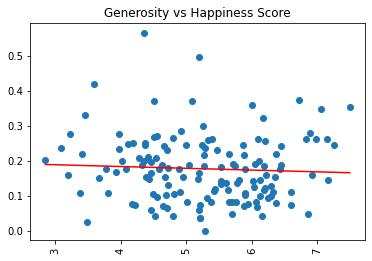

In [211]:
plt.clf()
x = df['Happiness_Score']
y = df['Generosity']
plt.title('Generosity vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

We can conclude that Generosity is weakly correlated to happiness index

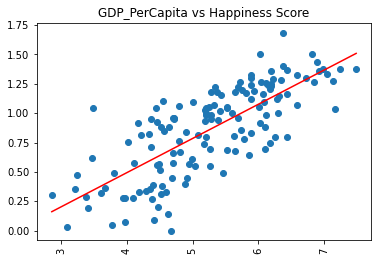

In [213]:
plt.clf()
x = df['Happiness_Score']
y = df['GDP_PerCapita']
plt.title('GDP_PerCapita vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

We can conclude that GDP is highly positively correlated to happiness index. So with the increase in GDP per capity, people are more happy in the country.
And therefore it indicates better standard of living.

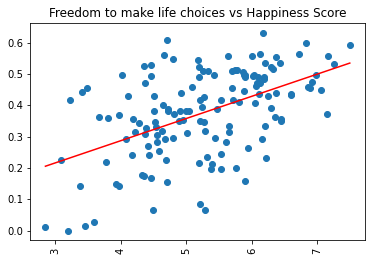

In [215]:
plt.clf()
x = df['Happiness_Score']
y = df['Freedom_to_make_life_choices']
plt.title('Freedom to make life choices vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

From the above scatter plot we can conclude that freedom to make life choices has a major contribution to extent of happiness

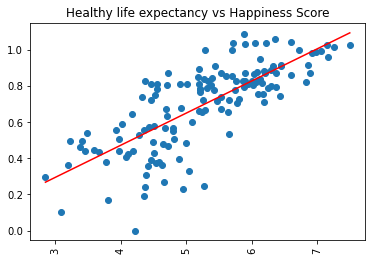

In [217]:
plt.clf()
x = df['Happiness_Score']
y = df['Healthy_life_expectancy']
plt.title('Healthy life expectancy vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

From the above scatter plot we can conclude that a healthy life expectancy has a major contribution to extent of happiness.
This states that people of countries with good medical facilities and cheap with respect to the GDP of that country are happier.

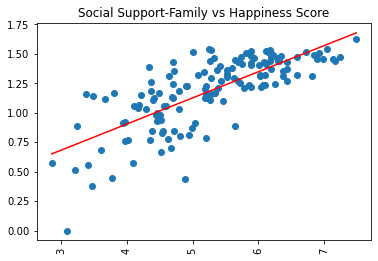

In [223]:
plt.clf()
x = df['Happiness_Score']
y = df['Social_Support']
plt.title('Social Support-Family vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

From the above scatter plot we can conclude that social support and social interactions has a major contribution to extent of happiness.
We can conclude that a country with good social support/humanitarian facilites have happier people

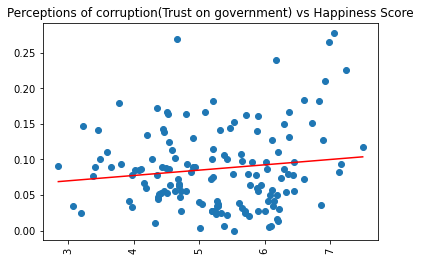

In [219]:
plt.clf()
x = df['Happiness_Score']
y = df['Perceptions_of_corruption']
plt.title('Perceptions of corruption(Trust on government) vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

We can conclude that Generosity is weakly correlated to happiness index i.e, happiness is not majorly effected by the amount of corruption by the local government or by the trust of the people on the government

# Correlation between features

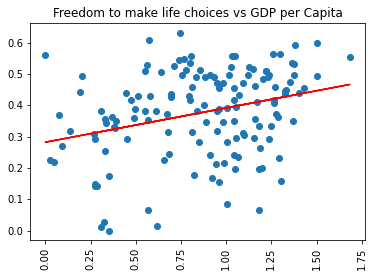

In [222]:
plt.clf()
x = df['GDP_PerCapita']
y = df['Freedom_to_make_life_choices']
plt.title('Freedom to make life choices vs GDP per Capita')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

Therefore, from the above scatter plot we can conclude that freedom to make life choices is strongly correlated to GDP of the country

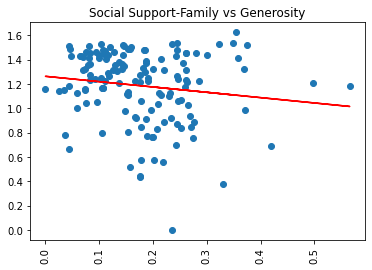

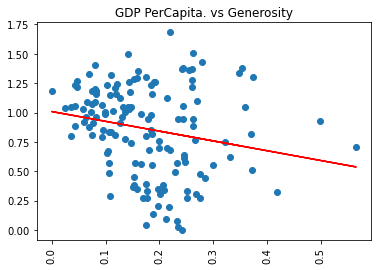

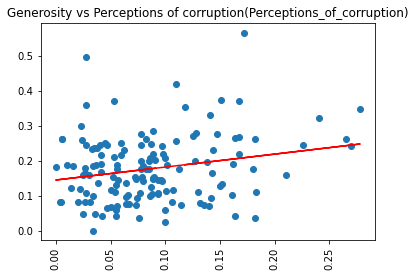

In [227]:
plt.clf()
x = df['Generosity']
y = df['Social_Support']
plt.title('Social Support-Family vs Generosity')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()


plt.clf()
x = df['Generosity']
y = df['GDP_PerCapita']
plt.title('GDP PerCapita. vs Generosity')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()


plt.clf()
x = df['Perceptions_of_corruption']
y = df['Generosity']
plt.title('Generosity vs Perceptions of corruption(Perceptions_of_corruption)')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

Here we observe a negetive correlation between these parameters mentioned above which implies as the GDP/standard of living increases, the sense of generosity and charity decreases as most of the population are stable in their life.
Also, generosity does not affect drastically the people's trust on the government

# Some Exception Countries

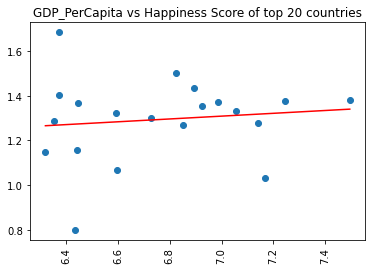

In [228]:
df_ = df.head(20)
x = df_['Happiness_Score']
y = df_['GDP_PerCapita']
plt.title('GDP_PerCapita vs Happiness Score of top 20 countries')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

In [229]:
df.head(20)

,Rank,Country,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2019
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,2019
12,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,2019
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,2019
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,2019
17,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,2019
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,2019
19,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,2019
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,2019


From  the above scatter plot we can conclude that even though country like Guatemala has low GDP and life expectency, people are happy because of high generosity and low corruption

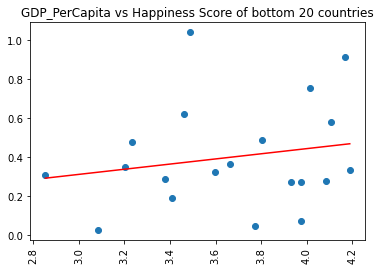

In [230]:
df_ = df.tail(20)
x = df_['Happiness_Score']
y = df_['GDP_PerCapita']
plt.title('GDP_PerCapita vs Happiness Score of bottom 20 countries')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

In [231]:
df.tail(20)

,Rank,Country,Happiness_Score,GDP_PerCapita,Social_Support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
135,136,Uganda,4.189,0.332,1.069,0.443,0.356,0.252,0.060,2019
136,137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067,2019
137,138,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087,2019
138,139,Togo,4.085,0.275,0.572,0.410,0.293,0.177,0.085,2019
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,2019
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,2019
141,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,2019
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041,2019
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,2019
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180,2019


By observing above graph and table, we can conclude that there are countries like Botswana,Egypt which has comparitively higher GDP per capita, but still at the bottom of the happiness score list because it has lower Trust on government and low generocity

In [234]:
#sns.factorplot('GDP_PerCapita', 'Happiness_Score',data=df)

# Machine Learning Models

MLR - Multiple Linear Regression : 

In [271]:
X=df[['GDP_PerCapita','Social_Support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']]
y=df['Happiness_Score']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [273]:
mlr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(mlr.coef_))
print("lr.intercept_: {}".format(mlr.intercept_))
print("Training set score: {:.2f}".format(mlr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlr.score(X_test, y_test)))

lr.coef_: [0.77409367 1.00396195 1.30514762 1.40360275 0.45290874 0.44918444]
lr.intercept_: 1.8494791733411788
Training set score: 0.72
Test set score: 0.82


In [243]:
y_pred_mlr= mlr.predict(X_test)

In [246]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
144,3.775,3.299172
30,6.321,6.172192
94,5.082,5.477397
109,4.696,4.879165
68,5.631,5.514041


In [247]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
#print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.3426333499523245
Mean Square Error: 0.1745270395058463
Root Mean Square Error: 0.4177643348897154


As there are only 142 rows it is difficult to improve our score.